# Investigating Fandango Movie Ratings  
Fandango is an online movie ratings aggregator. In 2015 Walt Hickey analysed ratings from Fandago and found strong evidence to suggest the Fandango's rating system was biased and dishonest. It was found for example that these was a significant discrepancy between the number of stars displayed to the actual rating. Fandango responded by saying it was not intentional and was a bug that will be fixed.  
## Are Fandago's Ratings Still Infalted  
The aim of the project it to analyse more recent reviews from Fandango to determine if there is still a discrepancy between stars displayed and actual rating

In [1]:
import pandas as pd
fandango_comparison = pd.read_csv('data/fandango_score_comparison.csv')
fandango_comparison = fandango_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
print(fandango_comparison.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  


In [2]:
ratings_16_17 = pd.read_csv('data/movie_ratings_16_17.csv')
ratings_16_17 = ratings_16_17[['movie', 'year', 'fandango']]
print(ratings_16_17.head())

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


Our population of interest is any film that has been reviewed on Fandango.  
The sampling in the Hickey study was any film with 30 or more reviews, however the second dataset included "the most popular movies (with a significant number of votes)" which is slightly different.

In [3]:
fandango_comparison['Year'] = fandango_comparison['FILM'].str[-5:-1]
fandango_comparison.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


## Fandango's ratings of the most popular movies 2015 vs 2016

We will compare the ratings of the most popular movies in 2015 and 2016 on Fandango. The aim is to see if the distribution of ratings in 2016 differed to 2015.   
With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.  
The term "popular" is vague and we need to define it with precision before continuing.  
We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.  

Next we are going to isolate films from 2015 and 2016 from the two datasets

In [4]:
fandango_2015 = fandango_comparison[fandango_comparison['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [5]:

fandango_2016 = ratings_16_17[ratings_16_17['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing distribution shapes

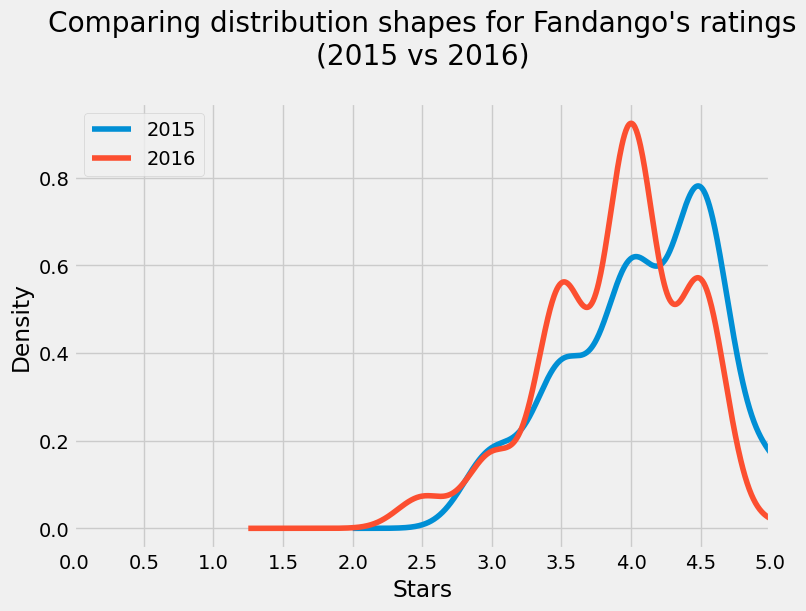

In [6]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) 
plt.xlabel('Stars')
plt.xlim(0,5) 
plt.xticks(arange(0,5.1,.5))
plt.show()

## Comparing Relative Frequencies

In [7]:
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [8]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

## Determining the Direction of the Change